# SECTION 18: INTRO TO LINEAR REGRESSION


- online-ds-pt-041320
- 07/10/20

## ANNOUNCEMENTS

### **UPCOMING SCHEDULE:**

- **Mod 2 Project starts in 2 weeks:**
    - Mod 2 Project Weeks (07/20 - 07/31)
    - **Post-Mod 2 Break Week (08/03 - 08/08)**
    - Project Reviews and Mod 3 Study Groups start on 08/10



- **Next week's study groups:**
    - **Wednesday we will cover section 19.**
    - **Friday's study group will EITHER be on:** 
        - Section 20: Extensions to Linear Models
        - OR the Appendix Multiple Regression Project
    - **We will take a poll after next study group** and decide as a group. 
    

### CATCHING UP ON LESSONS/LABS

- **If you're behind** and still on sections 13-17:
    - **Jump to sections 18,19, and the appendix section** "Multiple Linear Regression Project"

    
    
- **Break week will give you extra time for polishing your projects and for returning to any backlogged lessons/labs.**
    

#  Intro to Statistical Learning


## Types of Data in Statistical Learning 

In the context of Statistical learning, there are two main types of data:

* **Dependent variables**: data that can be controlled directly (other names: outcome variables, target variables, response variables) 
* **Independent variables**: data that cannot be controlled directly (other names: predictor variables, input variables, explanatory variables, features)

$$ y = mx+b $$

$$ dependent = m*independent+constant$$

$$ income = m*age+constant$$

$$ weight = m*height+constant$$

## Linear Regression 

In [3]:
# !pip install -U fsds
from fsds.imports import *
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-poster')

## Load in ames dataset
df = fs.datasets.load_ames_train(subset=True)

## Preview Data
display(df.head());

## Save Columns of Interest
X = df['GrLivArea'].copy()
y = df['SalePrice'].copy()

,YrSold,MoSold,Fireplaces,TotRmsAbvGrd,GrLivArea,FullBath,YearRemodAdd,YearBuilt,OverallCond,OverallQual,LotArea,SalePrice
0,2008,2,0,8,1710,2,2003,2003,5,7,8450,208500
1,2007,5,1,6,1262,2,1976,1976,8,6,9600,181500
2,2008,9,1,6,1786,2,2002,2001,5,7,11250,223500
3,2006,2,1,7,1717,1,1970,1915,5,7,9550,140000
4,2008,12,1,9,2198,2,2000,2000,5,8,14260,250000


(<Figure size 921.6x633.6 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1083572e8>)

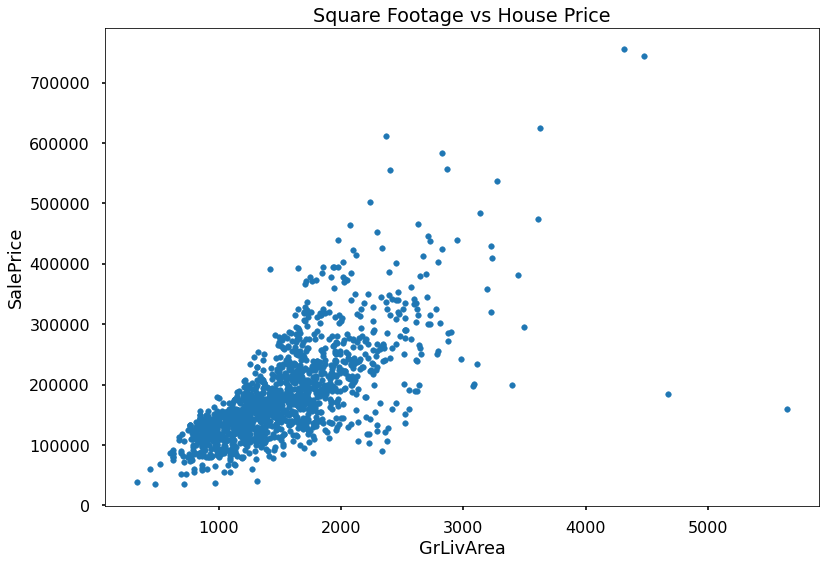

In [4]:
## Scatter Plots for Linearity Check
def plot_data(X,y):
    fig, ax = plt.subplots()
    ax.scatter(X,y,marker='.')
    ax.set(xlabel='GrLivArea',ylabel='SalePrice')
    ax.set_title('Square Footage vs House Price')
    return fig,ax

plot_data(X,y)


$$ \large y = m * x + b $$

<img src="https://raw.githubusercontent.com/learn-co-students/dsc-simple-linear-regression-online-ds-ft-100719/master/images/linreg.png" width=500>

- The following 3 equations below are all equivalent.

$$ \large y = m * x + b $$

$$\large \hat{y} = \hat mx + \hat c$$

$$\large y =  \beta_0+ \beta_1 x $$


In [5]:
## Read in data description
with open('data_description.txt') as f:
    lines = f.readlines()
    
## Save index of lines that contain column names
column_lines = [i for i in range(len(lines)) if lines[i].startswith((' ','\n','\t'))==False]

# print("DATASET COLUMNS:\n")
# print(''.join([lines[i] for i  in column_lines]))

### Our "worst model" is using the mean.

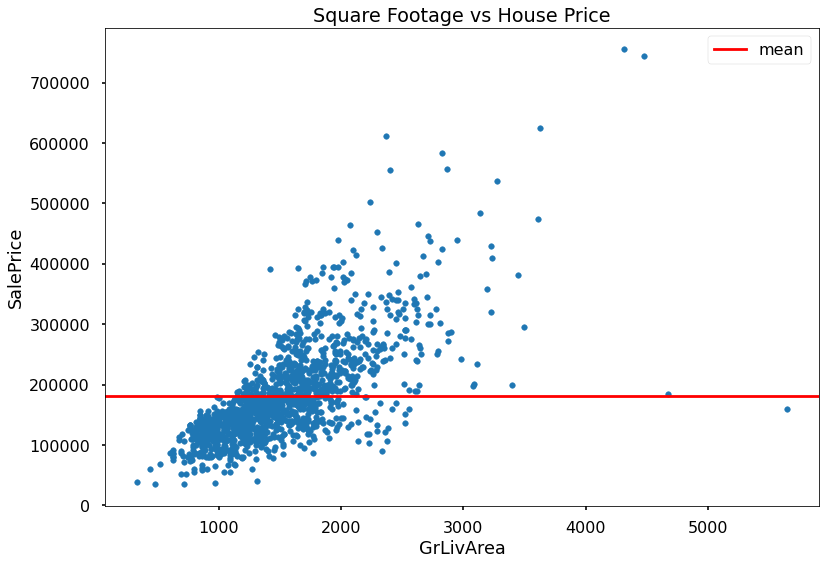

In [6]:
fig,ax = plot_data(X,y)
ax.axhline(y.mean(),color='red',label='mean')
plt.legend()

<img src="https://raw.githubusercontent.com/learn-co-students/dsc-simple-linear-regression-online-ds-ft-100719/master/images/linregall.png" width=500>

# Linear Regression Assumptions

### 1. Linearity

> The linearity assumptions requires that there is a **linear relationship** between the response variable (Y) and predictor (X). Linear means that the change in Y by 1-unit change in X, is constant. 

>The linearity assumption can best be tested with scatter plots 


**Note: As an extra measure, it is also important to check for outliers as the presence of outliers in the data can have a major impact on the model.**

<img src="https://raw.githubusercontent.com/learn-co-students/dsc-regression-assumptions-online-ds-ft-100719/master/images/outliers.png" width="600">

### 2. Normality 


> The normality assumption states that the **model residuals** should follow a normal distribution

Note that the normality assumption talks about the **model residuals** and _not_ about the distributions of the **variables**! In general, data scientists will often check the distributions of the variables as well.  The easiest way to check for the normality assumption is with histograms or a Q-Q-Plots. 

### 3. Homoscedasticity 

> _Heteroscedasticity_ (also spelled heteroskedasticity) refers to the circumstance in which the dependent variable is unequal across the range of values of the predictor(s).

<img src="https://raw.githubusercontent.com/learn-co-students/dsc-regression-assumptions-online-ds-ft-100719/master/images/homo_2.png" width="700">


As a first check, always looks at plots for the residuals. If you see anything similar to what is shown below, you are violating one or more assumptions and the results will not be reliable.

<img src="https://raw.githubusercontent.com/learn-co-students/dsc-regression-assumptions-online-ds-ft-100719/master/images/prob_2.png" width="700">

#### Q-Q Plots

>In statistics, a Q–Q (quantile-quantile) plot is a probability plot, which is a graphical method for comparing two probability distributions by plotting their quantiles against each other.
<img src="https://raw.githubusercontent.com/learn-co-students/dsc-ols-regression-diagnostics-online-ds-ft-100719/master/images/inhouse_qq_density.png">

<!---
<img src="https://raw.githubusercontent.com/learn-co-students/dsc-regression-assumptions-online-ds-ft-100719/master/images/inhouse_qq_plots.png" width="500">--->



### Judging Our Model: R-Squared

The mathematical formula to calculate R-Squared for a linear regression line is in terms of **squared errors** for the fitted model and the baseline model. It's calculated as :

$$ \large R^2 = 1- \dfrac{SS_{RES}}{SS_{TOT}} = 1 - \dfrac{\sum_i(y_i - \hat y_i)^2}{\sum_i(y_i - \overline y_i)^2} $$

# Linear Regression in Statsmodels

In [8]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

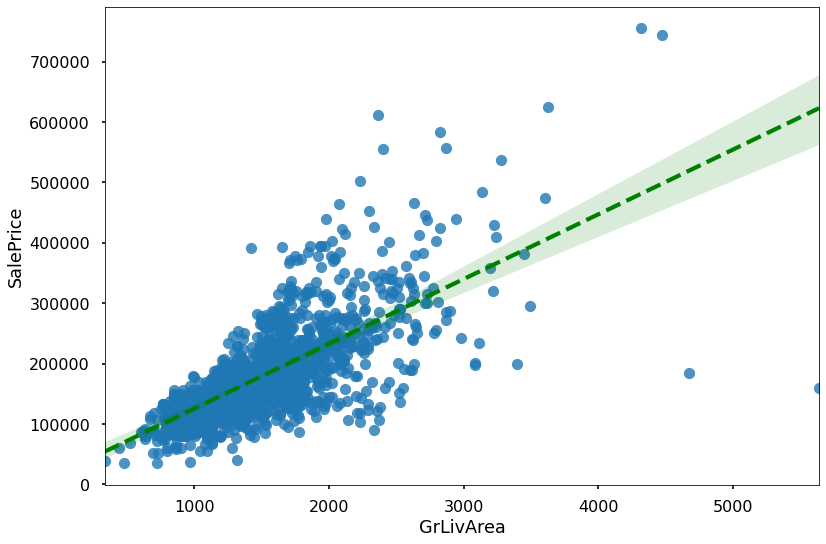

In [13]:
## Check Linearity 
ax = sns.regplot(X,y,line_kws={'color':'green','ls':'--'})


Normal Test Results:
X =  NormaltestResult(statistic=437.12025688620986, pvalue=1.203766500154145e-95)
y =  NormaltestResult(statistic=610.8359109472653, pvalue=2.283848353787728e-133)


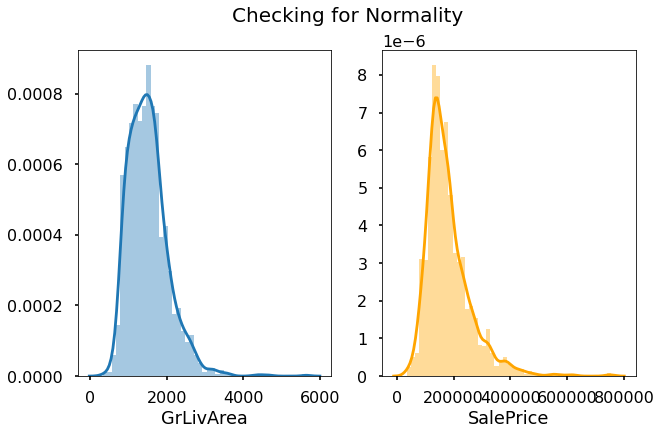

In [30]:
fig,ax = plt.subplots(ncols=2,figsize=(10,6))
sns.distplot(X,ax=ax[0])
sns.distplot(y,ax=ax[1],color='orange')
plt.suptitle('Checking for Normality',fontsize=20)

print('Normal Test Results:')
print('X = ',stats.normaltest(X))
print('y = ',stats.normaltest(y))

In [ ]:
df['GrLivArea_log'] = np.log(df['GrLivArea'])

In [31]:
# idx_nonoutliers = np.abs(stats.zscore(df['GrLivArea'])) <= 3
# df_clean = df[idx_nonoutliers].copy()
# df_clean

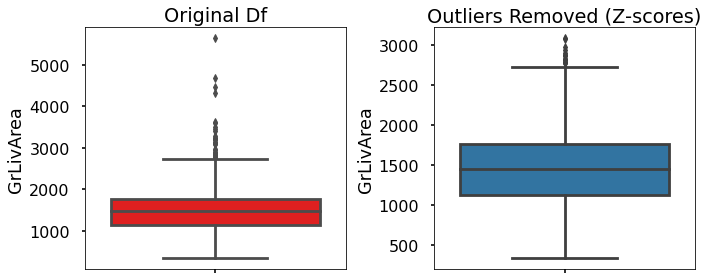

In [32]:
f,axes = plt.subplots(ncols=2,figsize=(10,4))

sns.boxplot(y=df['GrLivArea'],ax=axes[0],color='red')
axes[0].set(title='Original Df')

sns.boxplot(y=df_clean['GrLivArea'],ax=axes[1])
axes[1].set(title='Outliers Removed (Z-scores)')

plt.tight_layout()

In [34]:
df_to_use = df.copy()

f = 'SalePrice~GrLivArea'
model = smf.ols(formula=f, data=df_to_use).fit()
display(model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Fri, 10 Jul 2020   Prob (F-statistic):          4.52e-223
Time:                        18:51:54   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.857e+04   4480.755      4.144      0.000    9779.612    2.74e+04
GrLivArea    107.1304      2.794     38.348      0.000     101.650     112.610
==============================================================================
Omnibus:                      261.166   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3432.287
Skew:                           0.410   Prob(JB):                         0.00
Kurtosis:                      10.467   Cond. No.                     4.90e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Statsmodels OLS Results - Except From Learn Lesson
- https://learn.co/tracks/module-2-data-science-career-2-1/statistics-ab-testing-and-linear-regression/section-18-introduction-to-linear-regression/ordinary-least-squares-in-statsmodels-ols


> **Here is a brief description of these measures:**

> The left part of the first table gives some specifics on the data and the model:
* **Dep. Variable**: Singular. Which variable is the point of interest of the model
* **Model**: Technique used, an abbreviated version of Method (see methods for more).
* **Method**: The loss function optimized in the parameter selection process. Least Squares since it picks the parameters that reduce the training error. This is also known as Mean Square Error [MSE].
* **No. Observations**: The number of observations used by the model, or size of the training data.
* **Degrees of Freedom Residuals**: Degrees of freedom of the residuals, which is the number of observations – number of parameters. Intercept is a parameter. The purpose of Degrees of Freedom is to reflect the impact of descriptive/summarizing statistics in the model, which in regression is the coefficient. Since the observations must "live up" to these parameters, they only have so many free observations, and the rest must be reserved to "live up" to the parameters' prophecy. This internal mechanism ensures that there are enough observations to match the parameters.
* **Degrees of Freedom Model**: The number of parameters in the model (not including the constant/intercept term if present)
* **Covariance Type**: Robust regression methods are designed to be not overly affected by violations of assumptions by the underlying data-generating process. Since this model is Ordinary Least Squares, it is non-robust and therefore highly sensitive to outliers.


> **The right part of the first table shows the goodness of fit:**
* **R-squared**: The coefficient of determination, the Sum Squares of Regression divided by Total Sum Squares. This translates to the percent of variance explained by the model. The remaining percentage represents the variance explained by error, the E term, the part that model and predictors fail to grasp.
* **Adj. R-squared**: Version of the R-Squared that penalizes additional independent variables. 
* **F-statistic**: A measure of how significant the fit is. The mean squared error of the model divided by the mean squared error of the residuals. Feeds into the calculation of the P-Value.
* **Prob (F-statistic) or P-Value**: The probability that a sample like this would yield the above statistic, and whether the model's verdict on the null hypothesis will consistently represent the population. Does not measure effect magnitude, instead measures the integrity and consistency of this test on this group of data.
* **Log-likelihood**: The log of the likelihood function.
* **AIC**: The Akaike Information Criterion. Adjusts the log-likelihood based on the number of observations and the complexity of the model. Penalizes the model selection metrics when more independent variables are added.
* **BIC**: The Bayesian Information Criterion. Similar to the AIC, but has a higher penalty for models with more parameters. Penalizes the model selection metrics when more independent variables are added.

> The second table shows the coefficient report: 
* **coef**: The estimated value of the coefficient. By how much the model multiplies the independent value by.
* **std err**: The basic standard error of the estimate of the coefficient. Average distance deviation of the points from the model, which offers a unit relevant way to gauge model accuracy.
* **t**: The t-statistic value. This is a measure of how statistically significant the coefficient is.
* **P > |t|**: P-value that the null-hypothesis that the coefficient = 0 is true. If it is less than the confidence level, often 0.05, it indicates that there is a statistically significant relationship between the term and the response.
* **[95.0% Conf. Interval]**: The lower and upper values of the 95% confidence interval. Specific range of the possible coefficient values.

> The third table shows information about the residuals, autocorrelation, and multicollinearity: 
* **Skewness**: A measure of the symmetry of the data about the mean. Normally-distributed errors should be symmetrically distributed about the mean (equal amounts above and below the line). The normal distribution has 0 skew.
* **Kurtosis**: A measure of the shape of the distribution. Compares the amount of data close to the mean with those far away from the mean (in the tails), so model "peakiness". The normal distribution has a Kurtosis of 3, and the greater the number, the more the curve peaks.
* **Omnibus D’Angostino’s test**: Provides a combined statistical test for the presence of skewness and kurtosis.
* **Prob(Omnibus)**: The above statistic turned into a probability
* **Jarque-Bera**: A different test of the skewness and kurtosis
* **Prob (JB)**: The above statistic turned into a probability
* **Durbin-Watson**: A test for the presence of autocorrelation (that the errors are not independent), which is often important in time-series analysis
* **Cond. No**: A test for multicollinearity (if in a fit with multiple parameters, the parameters are related to each other).

The interpretation of some of these measures will be explained in the next lessons. For others, you'll get a better insight into them in the lessons on statistics. 


## Diagnosing Regressions in Statsmodels
* Use Q-Q plots to check for the normality in residual errors
* Use the Jarque-Bera test for normal distribution of residuals
* Check for heteroscedasticity using the Goldfeld-Quandt test to check whether the variance is the same in 2 samples


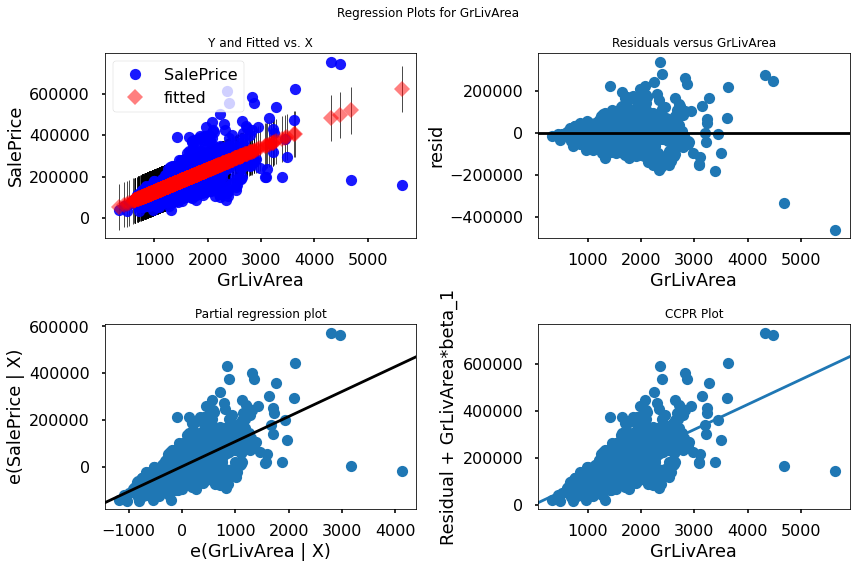

In [36]:
fig = sm.graphics.plot_regress_exog(model, "GrLivArea",fig=plt.figure(figsize=(12,8)))

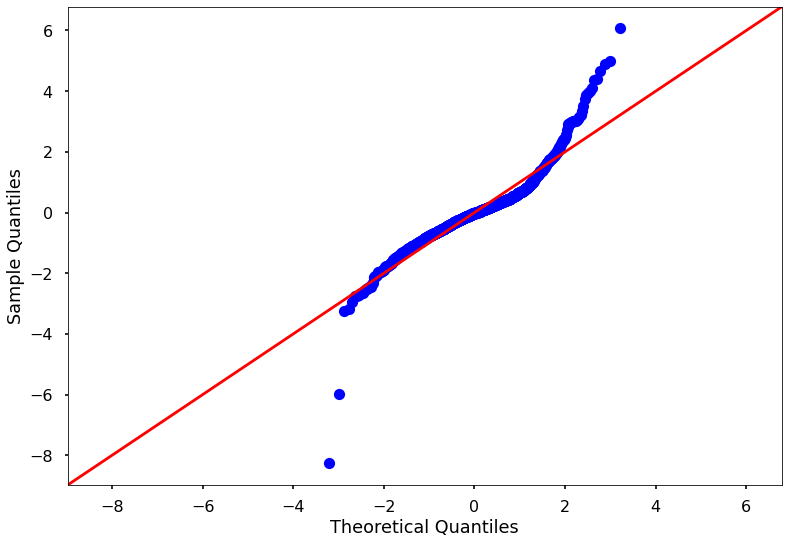

In [38]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)


In [ ]:
## QQ Plots
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats

data = pd.read_csv('https://raw.githubusercontent.com/learn-co-students/dsc-ols-regression-diagnostics-online-ds-ft-100719/master/advertising.csv', index_col=0)
f = 'sales~TV'
f2 = 'sales~radio'
model = smf.ols(formula=f, data=data).fit()
model2 = smf.ols(formula=f2, data=data).fit()

resid1 = model.resid
resid2 = model2.resid
# model.summary()


In [ ]:
plt.rcParams['figure.figsize'] = (12,6)
fig, ax = plt.subplots(ncols=2)
fig = sm.graphics.qqplot(resid1, dist=stats.norm, line='45', fit=True,ax=ax[0])
fig = sm.graphics.qqplot(resid2, dist=stats.norm, line='45', fit=True,ax=ax[1])
plt.tight_layout()
fig.show()

# APPENDIX


## Covariance

In some cases, you'll want to look at **two variables** to get an idea about how they **change together**. In statistics, when trying to figure out how two variables **vary together**, you can use the **covariance** between these variables.



If you have $X$ and $Y$, two variables having $n$ elements each. You can calculate covariance ($\sigma_{xy}$) between these two variables by using the formula:

$$ \large \sigma_{XY} = \dfrac{1}{n}\displaystyle\sum_{i=1}^{n}(x_i -\mu_x)(y_i - \mu_y)$$

- $\sigma_{XY}$ = Covariance between $X$ and $Y$
- $x_i$ = ith element of variable $X$
- $y_i$ = ith element of variable $Y$
- $n$ = number of data points (__$n$ must be same for $X$ and $Y$__)
- $\mu_x$ = mean of the independent variable $X$
- $\mu_y$ = mean of the dependent variable $Y$


> You can see that the formula calculates the variance of $X$ and $Y$ by multiplying the variance of each of their corresponding elements. Hence the term **covariance**.



#### Interpreting covariance values 

Covariance values range from positive infinity to negative infinity. 

* A **positive covariance** indicates that two variables are **positively related**

* A **negative covariance** indicates that two variables are **inversely related**

* A **covariance equal or close to 0** indicates that there is **no linear relationship** between two variables



## Correlation


> Correlation is calculated by **standardizing covariance** by some measure of variability in the data. It produces a quantity that has intuitive interpretations and consistent scale. 



### Pearson's correlation coefficient ( $r$ )

__Pearson Correlation Coefficient__, $r$, also called the __linear correlation coefficient__, measures the strength and the direction of a __linear relationship__ between two variables. This coefficient quantifies the degree to which a relationship between two variables can be described by a line. 





Pearson Correlation ($r$) is calculated using following formula :

$$ \large r = \frac{\sum_{i=1}^{n}(x_i -\mu_x)(y_i - \mu_y)} {\sqrt{\sum_{i=1}^{n}(x_i - \mu_x)^2 \sum_{i=1}^{n}(y_i-\mu_y)^2}}$$

So just like in the case of covariance,  $X$ and $Y$ are two variables having $n$ elements each. 


- $x_i$ = ith element of variable $X$
- $y_i$ = ith element of variable $Y$
- $n$ = number of data points (__$n$ must be same for $X$ and $Y$__)
- $\mu_x$ = mean of the independent variable $X$
- $\mu_y$ = mean of the dependent variable $Y$
- $r$ = Calculated Pearson Correlation



> _The Pearson Correlation formula always gives values in a range between -1 and 1_


<img src="https://raw.githubusercontent.com/learn-co-students/dsc-correlation-covariance-online-ds-sp-000/master/images/correlation.png">



## Correlation is not causation

> Causation is when any change in the value of one variable leads to a change in the value of another variable, which means one variable _causes_ the change in another. This is also referred to as __cause and effect__.

#### Example 1: Ice cream sales are correlated with the number of homicides in New York 


<img src="https://raw.githubusercontent.com/learn-co-students/dsc-correlation-covariance-online-ds-sp-000/master/images/ice_murder.png" width=500>

### The hidden factor

<img src="https://raw.githubusercontent.com/learn-co-students/dsc-correlation-covariance-online-ds-sp-000/master/images/hidden_factor.png">


#### Example 2: Number of Nicholas Cage movie releases correlates with people drowning in pools


<img src="https://raw.githubusercontent.com/learn-co-students/dsc-correlation-covariance-online-ds-sp-000/master/images/cage.png">


## Additional Reference Material:
- [Math notation pdf from Learn lesson](https://drive.google.com/file/d/1iu5pj-1q0KX6YmCX1vneS-uTmbaaZXkD/view?usp=sharing)
- [Covariance — Different Ways to Explain or Visualize It - Found by Devin](https://stats.seandolinar.com/covariance-different-ways-to-explain/)

